# seaborn学习笔记-类别数据可视化之catplot

```
seaborn.catplot(x=None, y=None, hue=None, data=None, row=None, col=None, col_wrap=None, estimator=<function mean>, ci=95, n_boot=1000, units=None, order=None, hue_order=None, row_order=None, col_order=None, kind='strip', height=5, aspect=1, orient=None, color=None, palette=None, legend=True, legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, **kwargs)
```

catplot与relplot函数相似，也是在FaceGrid绘图的figure-level函数，大部分参数与relplot相同，此处不再一一介绍。
catplot也是通过kind参数来调用不同的底层axes-level函数。这些底层函数可以分为三类：
1. 类别散点图
    - stripplot() (kind="strip"; 默认)
    - swarmplot() (with kind="swarm")
2. 类别分布图
    - boxplot() (with kind="box")
    - violinplot() (with kind="violin")
    - boxenplot() (with kind="boxen")
3. 类别估计图
    - pointplot() (with kind="point")
    - barplot() (with kind="bar")
    - countplot() (with kind="count")


In [6]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

## 类别散点图

catplot的默认行为是绘制散点图。在seaborn中有两种不同的类别散点图函数。主要区别在于沿着分类变量对应的轴线属于一个类别的点落在同一位置上时如何处理。
catplot的参数kind默认值使用stripplot()函数绘图，该函数采用少量的随机“抖动”来调整分类轴上的点的位置。

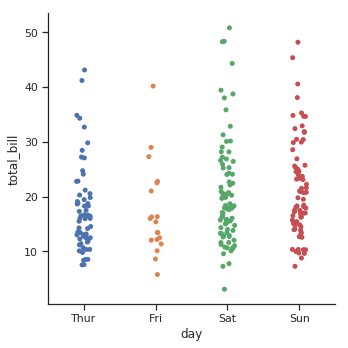

In [7]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips)

参数jitter用于控制抖动的大小，False禁用抖动，True使用默认的抖动大小，或者用一个float数值表示抖动大小，通常[0-0.5]

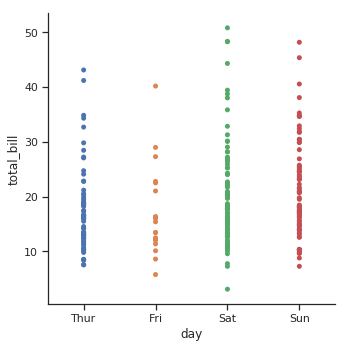

In [14]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips)

另一种方法时使用某种防重合的算法来调整点的位置，对于较小的数据集，这种方法可以更好的展示观测值的分布。可以设置kind参数值为swarm来调用swarmplot()绘制散点图。

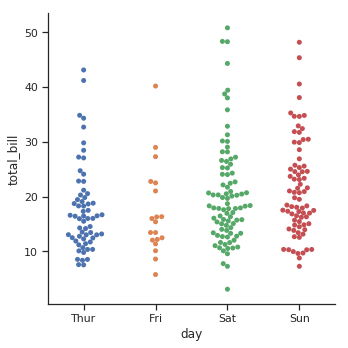

In [15]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips)

与关系图的绘制类似，通过设置颜色（hue）、样式（style）以及大小（size）来增加不同的维度

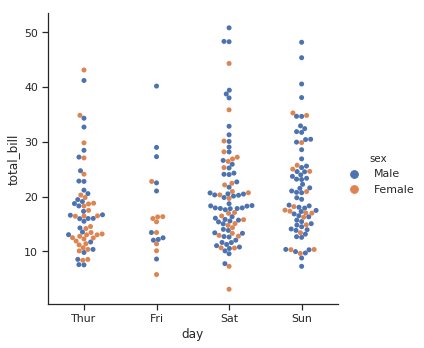

In [16]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips)

如果赋值给类别轴变量的类型为数值型类型，seaborn会对其进行排序，然后将其视作分类数据来绘图

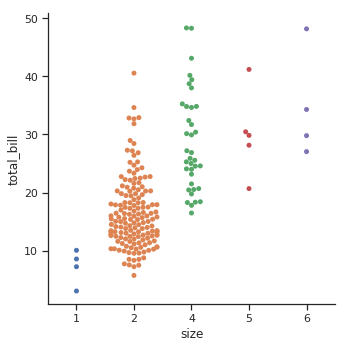

In [17]:
sns.catplot(x="size", y="total_bill", kind="swarm",data=tips.query("size != 3"))

当然也可以通过order参数自定义类别轴上的顺序。如果需要在同一个图上绘制多个类别图，这个参数十分重要

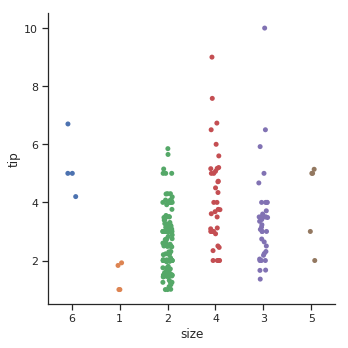

In [19]:
sns.catplot(x="size", y="tip", order=[6,1,2,4,3,5], data=tips)

以上示例中都是用横轴代表类别变量，当然也可以用纵轴代表类别变量。

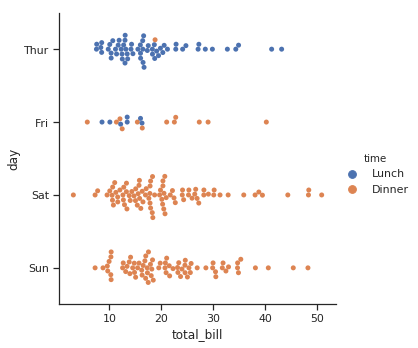

In [20]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips)

## 类别分布图